Import

In [295]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Acquisition

In [296]:

data = pd.read_csv('clean_dataset_stem.csv',sep=';')


In [297]:
data_feature = data['ProcessedText'].astype(str)

In [298]:
data_feature

0      cegah mata rantai covid kita rumah hingga hari...
1      aku mohon yaallah moga wabah covid hilang rama...
2      pemprov papua naik status jadi tanggap darurat...
3                      covid nyampe prigen mbak hmm hoax
4      nyuruh orang pintar lu aja togog kerumun orang...
                             ...                        
897    seluruh negara dunia alami masa sulit covid ra...
898    covid skripsi disaster selesai mau bgt bljr ma...
899    malam projek benda bincang malam fb satu belia...
900                          pontang panting koyak covid
901    masalah sekarang isu jangkit covid alaaaa bosa...
Name: ProcessedText, Length: 902, dtype: object

In [299]:
data.shape

(902, 10)

In [300]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
3,3,3,Covid belum nyampe prigen mbak hmm hoax,0.0,covid belum nyampe prigen mbak hmm hoax,"['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'belum', 'nyampe', 'prigen', 'mbak',...",covid belum nyampe prigen mbak hmm hoax,covid belum nyampe prigen mbak hmm hoax,covid nyampe prigen mbak hmm hoax
4,4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,nyuruh orang pintar lu aja togog itu kerumunan...,"['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...","['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...",nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog kerumun orang...


In [301]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     902 non-null    int64  
 1   Unnamed: 0.1   902 non-null    int64  
 2   Tweet          902 non-null    object 
 3   Sentimen       902 non-null    float64
 4   step01         902 non-null    object 
 5   tokens         902 non-null    object 
 6   final_tokens   902 non-null    object 
 7   step02         902 non-null    object 
 8   finalText_str  902 non-null    object 
 9   ProcessedText  902 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 70.6+ KB


Distribusi Label

In [302]:


dataset_label = data['Sentimen']
dataset_label

0      1.0
1      1.0
2      1.0
3      0.0
4     -1.0
      ... 
897    1.0
898    1.0
899    0.0
900   -1.0
901   -1.0
Name: Sentimen, Length: 902, dtype: float64

c:\Users\Asus\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


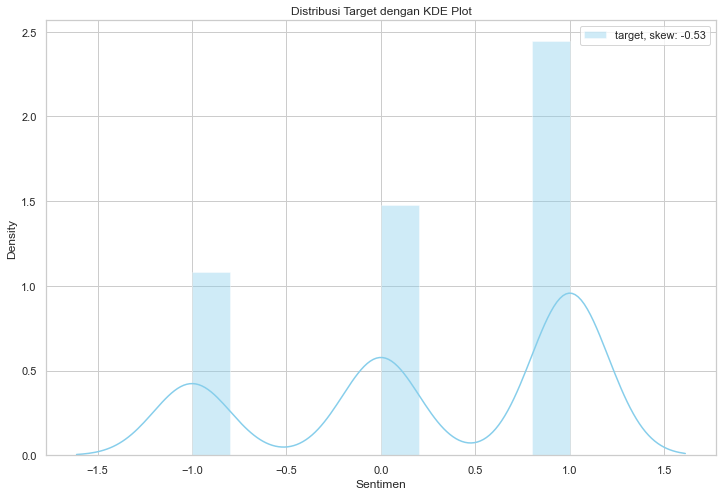

In [303]:

sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}', color='skyblue')
plt.title('Distribusi Target dengan KDE Plot')
plt.legend(loc='best')
plt.show()

In [304]:
dataset_label.value_counts()

 1.0    441
 0.0    266
-1.0    195
Name: Sentimen, dtype: int64

Feature Extraction TF-IDF

In [305]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [306]:
tf_idf = TfidfVectorizer()
tf_idf.fit(data_feature)  #menggunakan data_feature langsung jika ingin melakukan fit pada data asli
X = tf_idf.transform(data_feature)  # Transformasi pada data_feature setelah melakukan fit pada tf_idf


In [307]:
print('Shape tf_idf:', X.shape)

Shape tf_idf: (902, 3867)


In [308]:
# jumlah fitur
print(f"Jumlah fitur: {len(tf_idf.get_feature_names())}")

# fitur
print(tf_idf.get_feature_names()[:20])

Jumlah fitur: 3867
['aa', 'aamiin', 'aamiingimana', 'aamiinmulut', 'aau', 'abai', 'abang', 'abdul', 'abdullah', 'abi', 'abis', 'abyasa', 'acah', 'acara', 'ace', 'aceh', 'achmad', 'actmalang', 'ad', 'ada']


c:\Users\Asus\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [309]:
# Melihat matriks jumlah token menggunakan TF IDF

data_tf_idf = tf_idf.get_feature_names_out()
data_tf_idf

array(['aa', 'aamiin', 'aamiingimana', ..., 'zmn', 'zona', 'zone'],
      dtype=object)

In [310]:
idfValues = tf_idf.idf_

In [311]:
d = dict(zip(data_tf_idf, 9 - idfValues))

In [312]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [313]:
for i in range(3867):
    print(sortedDict[i])

('covid', 7.96735782223855)
('yg', 6.077079369169385)
('virus', 5.758625638050851)
('sebar', 5.525010786869346)
('corona', 5.498342539787185)
('sama', 5.4847368877314056)
('cegah', 5.45695732362433)
('rumah', 5.45695732362433)
('orang', 5.413785151759122)
('jadi', 5.39897006597398)
('semua', 5.39897006597398)
('wabah', 5.321411831628106)
('moga', 5.271814890488734)
('indonesia', 5.201610631815486)
('pandemi', 5.164569360135136)
('perintah', 5.164569360135136)
('tangan', 5.12610307930734)
('hari', 5.10630045201116)
('ada', 5.065478457490905)
('tak', 5.000939936353334)
('warga', 5.000939936353334)
('banyak', 4.978467080501275)
('lebih', 4.978467080501275)
('pasien', 4.978467080501275)
('positif', 4.978467080501275)
('bantu', 4.955477562276577)
('sehat', 4.955477562276577)
('masyarakat', 4.9319470648663835)
('mau', 4.9319470648663835)
('buat', 4.9078495132873226)
('satu', 4.9078495132873226)
('bukan', 4.883156900696951)
('kena', 4.883156900696951)
('laku', 4.857839092712661)
('apa', 4.831

WordCloud

In [314]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

In [315]:

# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2023-10-15 19:04:52--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg


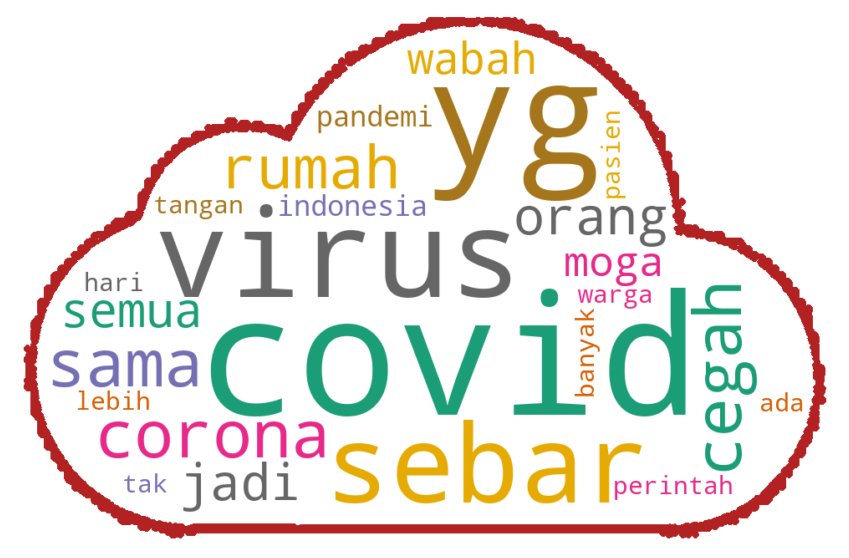

In [316]:


def PlotWordCloud(frequency, cloud_mask_path):
    cloud_mask = np.array(Image.open(cloud_mask_path))
    
    wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate_from_frequencies(frequencies=frequency)
    
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

PlotWordCloud(d, 'cloud.jpg')
